In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('./data/busan_기온.csv', encoding='cp949', 
                 skiprows=7)

In [6]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [7]:
df[df['최고기온(℃)'] == df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


In [8]:
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)']

In [9]:
df[df['일교차'] == df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


In [10]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [12]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

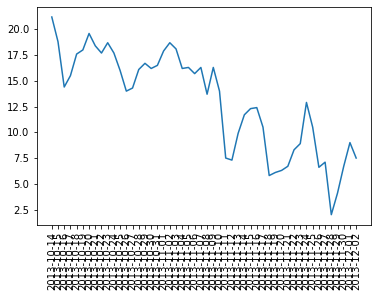

In [15]:
plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050], rotation=90)
plt.show()

In [16]:
df['연도'] = df['날짜'].apply(lambda x: x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x: x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x: x.split('-')[2])
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차,연도,월,일
0,1904-04-09,159,11.3,7.8,16.1,8.3,1904,04,09
1,1904-04-10,159,9.3,4.7,15.2,10.5,1904,04,10
2,1904-04-11,159,10.6,NaN,14.9,NaN,1904,04,11
3,1904-04-12,159,11.3,8.8,13.4,4.6,1904,04,12
4,1904-04-13,159,14.5,11.1,16.9,5.8,1904,04,13


In [20]:
year = df[df['연도'] >= '2000']['연도'].unique()

In [21]:
ticks = range(len(year))

In [23]:
최고기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')
]['최고기온(℃)']

In [24]:
최고기온.index = ticks

In [25]:
최고기온

0     12.1
1     11.9
2     15.1
3      8.6
4     10.0
5      9.4
6      6.4
7     14.5
8     13.4
9     13.6
10     9.9
11     9.7
12    12.5
13    14.2
14    11.4
15     9.6
16     7.7
17    13.8
18    12.0
19    16.1
20    15.6
21    15.5
22    15.0
Name: 최고기온(℃), dtype: float64

In [26]:
최저기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')
]['최저기온(℃)']

In [27]:
최저기온.index = ticks

In [28]:
최저기온

0     1.0
1     6.0
2     6.8
3     5.7
4     4.5
5    -0.1
6     0.4
7     4.7
8     2.1
9     5.9
10    5.5
11    2.5
12    6.2
13    1.1
14    8.0
15    2.2
16   -4.3
17    6.2
18    2.7
19    7.0
20    7.2
21    5.2
22    8.3
Name: 최저기온(℃), dtype: float64

In [30]:
df_group = df.groupby('연도')['평균기온(℃)'].mean()

<AxesSubplot:xlabel='연도'>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


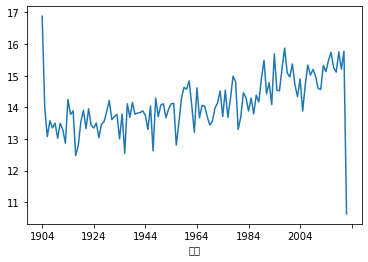

In [31]:
df_group.plot()

In [32]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.700e+01, 1.300e+01,
        1.500e+01, 2.600e+01, 4.800e+01, 4.200e+01, 5.400e+01, 6.000e+01,
        1.060e+02, 1.230e+02, 9.600e+01, 1.850e+02, 1.220e+02, 2.000e+02,
        1.800e+02, 2.920e+02, 2.340e+02, 3.150e+02, 2.810e+02, 4.070e+02,
        4.190e+02, 3.690e+02, 5.070e+02, 4.230e+02, 5.760e+02, 4.550e+02,
        6.520e+02, 5.020e+02, 6.740e+02, 5.270e+02, 7.430e+02, 6.920e+02,
        5.510e+02, 6.700e+02, 5.500e+02, 6.910e+02, 5.840e+02, 7.350e+02,
        5.770e+02, 6.760e+02, 7.060e+02, 5.950e+02, 6.740e+02, 5.340e+02,
        7.620e+02, 6.090e+02, 7.200e+02, 5.540e+02, 8.060e+02, 6.060e+02,
        7.670e+02, 7.790e+02, 7.060e+02, 9.070e+02, 7.350e+02, 9.740e+02,
        8.050e+02, 1.066e+03, 8.440e+02, 1.143e+03, 1.066e+03, 8.930e+02,
        1.073e+03, 8.280e+02, 9.860e+02, 7.560e+02, 8.890e+02, 6.960e+02,
        7.080e+02, 5.920e+02, 7.240e+0

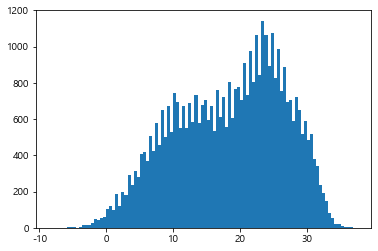

In [34]:
plt.hist(df['최고기온(℃)'], bins=100)

In [35]:
df = pd.read_csv('./data/people_202101.csv', encoding='cp949', thousands=',')

In [37]:
df.head()

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_91세,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상
0,서울특별시 (1100000000),9657969,9657969,44249,49910,52741,56732,63560,68419,67870,...,8394,6867,5185,3741,2719,1998,1956,1495,1070,6853
1,서울특별시 종로구 (1111000000),149125,149125,464,588,564,663,761,841,833,...,194,164,123,105,83,57,54,58,44,276
2,서울특별시 종로구 청운효자동(1111051500),12426,12426,47,60,65,77,71,104,91,...,15,11,7,6,10,3,6,6,1,20
3,서울특별시 종로구 사직동(1111053000),9544,9544,27,37,33,54,69,64,82,...,22,15,12,6,9,4,4,6,2,21
4,서울특별시 종로구 삼청동(1111054000),2613,2613,7,7,6,16,3,17,7,...,7,4,3,3,1,3,0,2,0,6


In [43]:
df2 = df[df['행정구역'] == '서울특별시 관악구 신림동(1162069500)']

In [40]:
df['행정구역_시'] = df['행정구역'].apply(lambda x: x.split(' ')[0])

In [42]:
df[df['행정구역_시'] == '부산광역시']

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상,행정구역_시
451,부산광역시 (2600000000),3389388,3389388,14305,17113,19108,21366,24298,26450,26265,...,2591,1945,1189,939,663,559,454,297,1901,부산광역시
452,부산광역시 중구 (2611000000),41549,41549,75,85,107,127,128,152,147,...,72,52,29,21,13,17,22,11,87,부산광역시
453,부산광역시 중구 중앙동(2611051000),2518,2518,3,6,3,5,5,1,3,...,8,1,1,2,1,1,3,1,3,부산광역시
454,부산광역시 중구 동광동(2611052000),2888,2888,6,5,6,10,8,8,5,...,11,3,6,4,1,1,4,0,5,부산광역시
455,부산광역시 중구 대청동(2611053000),6505,6505,7,13,14,17,21,23,28,...,16,11,8,3,2,4,2,1,9,부산광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,부산광역시 기장군 기장읍(2671025000),53060,53060,214,231,263,332,341,324,326,...,41,45,27,28,12,12,8,8,20,부산광역시
669,부산광역시 기장군 장안읍(2671025300),8663,8663,50,36,32,40,31,33,50,...,10,12,5,6,5,5,5,1,11,부산광역시
670,부산광역시 기장군 정관읍(2671025600),81877,81877,659,767,912,1074,1314,1402,1520,...,27,26,19,19,7,7,4,1,5,부산광역시
671,부산광역시 기장군 일광면(2671031000),23776,23776,241,304,314,321,355,337,335,...,17,9,7,8,6,2,5,3,6,부산광역시


In [46]:
df2.drop(['행정구역', '2021년01월_계_총인구수', '2021년01월_계_연령구간인구수', '행정구역_시'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12324\1914892301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['행정구역', '2021년01월_계_총인구수', '2021년01월_계_연령구간인구수', '행정구역_시'], axis=1, inplace=True)


In [47]:
df2

,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,2021년01월_계_7세,2021년01월_계_8세,2021년01월_계_9세,...,2021년01월_계_91세,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상
355,42,43,29,47,39,37,40,21,29,32,...,10,8,6,5,3,1,1,1,3,16


In [48]:
df3 = df2.melt()
df3.drop('variable', axis=1, inplace=True)
df3

,value
0,42
1,43
2,29
3,47
4,39
...,...
96,1
97,1
98,1
99,3


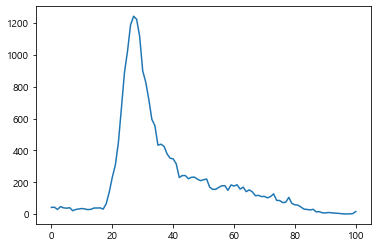

In [49]:
plt.plot(df3)

<BarContainer object of 101 artists>

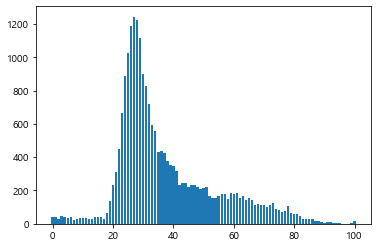

In [51]:
plt.bar(df3.index, df3.value)

In [52]:
df = pd.read_csv('./data/people_gender_202101.csv', encoding='cp949', thousands=',')

In [53]:
df

,행정구역,2021년01월_남_총인구수,2021년01월_남_연령구간인구수,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
0,서울특별시 (1100000000),4695999,4695999,317563,399754,704862,735813,755311,748598,590203,...,379156,750182,735793,769360,774385,659895,384751,170791,31697,5026
1,서울특별시 종로구 (1111000000),72528,72528,3767,5443,11493,9883,10800,12765,9979,...,5494,11838,10034,11332,12645,10090,6990,3582,731,179
2,서울특별시 종로구 청운효자동(1111051500),5784,5784,430,618,795,772,969,922,620,...,547,795,911,1179,1059,775,605,311,50,17
3,서울특별시 종로구 사직동(1111053000),4273,4273,290,306,568,619,668,695,567,...,386,667,822,824,856,645,446,264,58,15
4,서울특별시 종로구 삼청동(1111054000),1251,1251,47,108,164,170,179,202,187,...,80,146,183,188,209,221,153,102,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,제주특별자치도 서귀포시 서홍동(5013058000),5313,5313,603,697,659,573,962,851,538,...,711,575,661,953,751,587,387,179,27,2
3842,제주특별자치도 서귀포시 대륜동(5013059000),7515,7515,821,709,815,1073,1351,1161,924,...,609,735,1086,1179,1087,969,593,290,60,6
3843,제주특별자치도 서귀포시 대천동(5013060000),7083,7083,866,685,748,1072,1335,1079,761,...,582,705,1148,1112,953,765,439,264,55,3
3844,제주특별자치도 서귀포시 중문동(5013061000),5946,5946,497,584,694,797,1101,1027,682,...,568,637,739,894,862,631,438,311,51,6


In [54]:
df2 = df[df['행정구역'] == '서울특별시 관악구 신림동(1162069500)']

In [55]:
df2

,행정구역,2021년01월_남_총인구수,2021년01월_남_연령구간인구수,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,서울특별시 관악구 신림동(1162069500),11398,11398,178,231,4032,3247,1425,999,695,...,243,4304,2378,1066,773,767,497,173,36,15


In [57]:
df2.drop(['행정구역', '2021년01월_남_총인구수','2021년01월_여_총인구수', '2021년01월_남_연령구간인구수','2021년01월_여_연령구간인구수'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12324\2493924102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['행정구역', '2021년01월_남_총인구수','2021년01월_여_총인구수', '2021년01월_남_연령구간인구수','2021년01월_여_연령구간인구수'], axis=1, inplace=True)


In [58]:
df2

,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,2021년01월_남_70~79세,2021년01월_남_80~89세,2021년01월_남_90~99세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,178,231,4032,3247,1425,999,695,443,138,9,...,243,4304,2378,1066,773,767,497,173,36,15


In [59]:
male = df2.iloc[:, 0:11]

In [60]:
female = df2.iloc[:, 11:]

In [61]:
male

,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,2021년01월_남_70~79세,2021년01월_남_80~89세,2021년01월_남_90~99세,2021년01월_남_100세 이상
355,178,231,4032,3247,1425,999,695,443,138,9,1


In [62]:
female

,2021년01월_여_0~9세,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,181,243,4304,2378,1066,773,767,497,173,36,15


In [65]:
male2 = male.melt()
male2.drop('variable', axis=1, inplace=True)
male2 = male2 * -1

In [66]:
male2

,value
0,-178
1,-231
2,-4032
3,-3247
4,-1425
5,-999
6,-695
7,-443
8,-138
9,-9


In [67]:
female2 = female.melt()
female2.drop('variable', axis=1, inplace=True)
female2

,value
0,181
1,243
2,4304
3,2378
4,1066
5,773
6,767
7,497
8,173
9,36


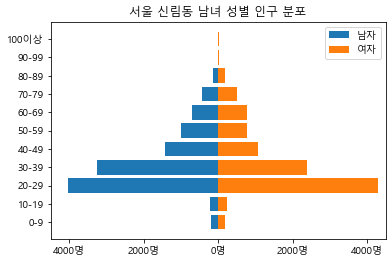

In [69]:
plt.title('서울 신림동 남녀 성별 인구 분포')
plt.barh(male2.index, male2['value'], label='남자')
plt.barh(female2.index, female2['value'], label='여자')
plt.yticks(
range(11),
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
'70-79', '80-89', '90-99', '100이상'])
plt.xlim(-4500, 4500)
plt.xticks(
range(-4000, 4001, 2000),
['4000명', '2000명', '0명', '2000명', '4000명'])
plt.legend()
plt.show()